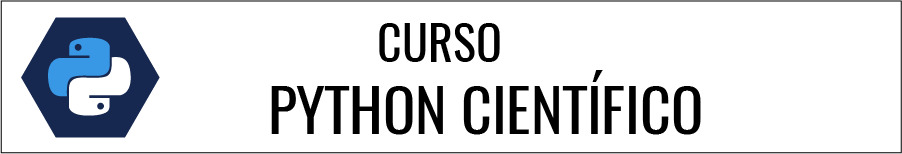

# Resolución de Ecuaciones Diferenciales Ordinarias (EDO)

Una ecuación diferencial ordinaria (comúnmente abreviada "EDO") es la ecuación diferencial que relaciona una función desconocida de una variable independiente con sus derivadas.  
Es decir, una sola variable independiente (a diferencia de las ecuaciones diferenciales parciales que involucran derivadas parciales de varias variables), y una o más de sus derivadas respecto de tal variable. 

Es decir, tenemos una ecuación de esta forma:

$$ \frac{d\mathbf{y}}{dt}=\mathbf{f}\left(t, \mathbf{y}\right)$$

Para integrar una EDOs vamos a usar la función `solve_ivp` del paquete `integrate`, que permite integrar sistemas del mencionado, con condiciones iniciales $\mathbf{y}(\mathbf{t_{in}}) = \mathbf{y_0}$ con $t_{in}$ el tiempo inicial de estudio del sistema.

<div class="alert alert-warning" role="alert">
Una versión anterior a esta es el método <b>scipy.integrate.odeint</b>, el cual fue reemplazdo por <b>solve_ivp</b>.
</div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from scipy.integrate import solve_ivp

<div class="alert alert-danger" role="alert">
    <b>¡Importante!</b>: La función del sistema recibe como primer argumento el instante $t$ (un escalar) y como segundo argumento $\mathbf{y}$ (un array).
</div>

Vamos a integrar primero una EDO elemental, cuya solución ya conocemos. 
#### Ejemplo 
*Una cantidad está sujeta a un decaimiento* si disminuye a una tasa proporcional con respecto a su valor actual.  
Simbólicamente, este proceso puede ser expresado por la siguiente ecuación diferencial, donde N es la cantidad y λ (lambda) es una tasa positiva llamada constante de decaimiento, en este caso representaremos a $N$ por $y$, esto es:

$$y' +  \lambda  \cdot  y = 0$$
$$y' = -\lambda \cdot y$$

$$f(y, t) = \frac{dy}{dt} = -\lambda \cdot y$$

definamos esta funcion $f(y, t)$

In [3]:
λ = 2.0   # Constante de decaimiento
def f(t, y):  # tener presente el nombre de la función 'f'
    f = np.array([-λ * y])
    return f

Definamos las condiciones iniciales:

In [4]:
y0 = np.array([10])   # Hacemos un arreglo con un dato igual a 10
print('y0 :', y0)

tini = 0   # Este es el intervalo de trabajo, tiempo inicial
tfin = 5   # tiempo final

y0 : [10]


<div class="alert alert-success" role="alert">
  <h4 class="alert-heading">Atención Unidades!</h4>
  <p>Las unidades utilizadas tanto para la variables como los parámetros de la función, debes ser compatibles.
      En este caso, $\lambda$ debe ser la constante de decaimiento, considerando las unidades del tiempo.
    </p>
  <hr>
    <p class="mb-0">Por ejemplo <i>segundos</i>.</p>
</div>

Integramos y representamos la solución:

In [5]:
sol = solve_ivp(f, (tini, tfin), y0)
print(sol)

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 80
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.        , 0.07578734, 0.53973378, 0.97766198, 1.41721513,
       1.8567034 , 2.29628294, 2.73606647, 3.17634056, 3.61778717,
       4.06200998, 4.51266579, 4.97756597, 5.        ])
 t_events: None
        y: array([[1.00000000e+01, 8.59353700e+00, 3.40019118e+00, 1.41686375e+00,
        5.88500654e-01, 2.44467954e-01, 1.01535514e-01, 4.21538764e-02,
        1.74836728e-02, 7.23458281e-03, 2.97709678e-03, 1.20951025e-03,
        4.77658137e-04, 4.56700227e-04]])
 y_events: None


--------------------------------------------------------------
**Returns**

    Bunch object with the following fields defined:
    tndarray, shape (n_points,)

        Time points.
    yndarray, shape (n, n_points)

        Values of the solution at t.
    solOdeSolution or None

        Found solution as OdeSolution instance; None if dense_output was set to False.
    t_eventslist of ndarray or None

        Contains for each event type a list of arrays at which an event of that type event was detected. None if events was None.
    y_eventslist of ndarray or None

        For each value of t_events, the corresponding value of the solution. None if events was None.
        
    nfevint
        Number of evaluations of the right-hand side.

    njevint
        Number of evaluations of the Jacobian.
        
    nluint
        Number of LU decompositions.
        
    statusint
        Reason for algorithm termination:
                -1: Integration step failed.

                0: The solver successfully reached the end of tspan.

                1: A termination event occurred.

    messagestring
        Human-readable description of the termination reason.
        
    successbool
        True if the solver reached the interval end or a termination event occurred (status >= 0).

----------------------------------------------------------------------------
veamos la solución

In [6]:
print(sol.t)
print('.............................................................')
print(sol.y)

[0.         0.07578734 0.53973378 0.97766198 1.41721513 1.8567034
 2.29628294 2.73606647 3.17634056 3.61778717 4.06200998 4.51266579
 4.97756597 5.        ]
.............................................................
[[1.00000000e+01 8.59353700e+00 3.40019118e+00 1.41686375e+00
  5.88500654e-01 2.44467954e-01 1.01535514e-01 4.21538764e-02
  1.74836728e-02 7.23458281e-03 2.97709678e-03 1.20951025e-03
  4.77658137e-04 4.56700227e-04]]


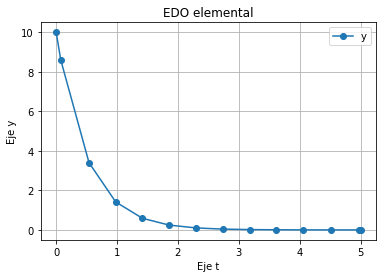

In [7]:
plt.plot(sol.t, sol.y[0, :], 'o-')
plt.grid()
plt.xlabel('Eje t')
plt.ylabel('Eje y')
plt.title('EDO elemental')
plt.legend(['y'], loc = 0)

la pregunta que surge es ¿cómo se han seleccionado los puntos en los que se calcula la solución?  
El solver los ha calculado por nosotros.  
Si queremos tener control sobre estos puntos, podemos pasar de manera explícita el vector de tiempos:

In [8]:
time = np.linspace(tini, tfin, 30)   # Definimos la variable tiempo

In [9]:
sol_2 = solve_ivp(f, (tini, tfin), y0, t_eval = time)

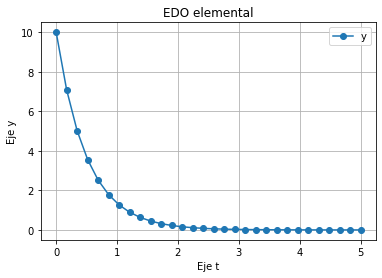

In [10]:
plt.plot(sol_2.t, sol_2.y[0, :], 'o-')
plt.grid()
plt.xlabel('Eje t')
plt.ylabel('Eje y')
plt.title('EDO elemental')
plt.legend(['y'], loc = 0)

Probemos a pintar las dos soluciones anteriores, una encima de la otra:

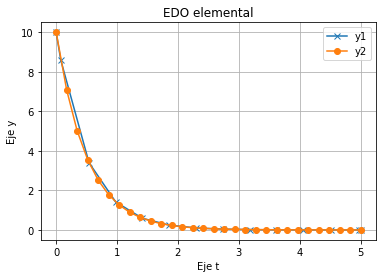

In [11]:
plt.plot(sol.t, sol.y[0, :], 'x-')
plt.plot(sol_2.t, sol_2.y[0, :], 'o-')
plt.grid()
plt.xlabel('Eje t')
plt.ylabel('Eje y')
plt.title('EDO elemental')
plt.legend(['y1', 'y2'], loc = 0)

Podemos observar que a pesar de que en la primera se han usado muchos menos puntos, aquellos en los que se ha calculado la solución coinciden con el segundo resultado. Esto se debe a que, en realidad, el solver siempre da los pasos que considere necesarios para calcular la solución, pero sólo guarda los que nosotros le indicamos. Esto lo podemos ver del siguiente modo:

In [12]:
print(f"Evaluaciones de funciones en sol 1: {sol.nfev}")
print(f"Evaluaciones de funciones en sol 2: {sol_2.nfev}")

Evaluaciones de funciones en sol 1: 80
Evaluaciones de funciones en sol 2: 80


Para ello podemos usar la salida densa `dense_output = True` para obtener la solución en un punto cualquiera:

In [13]:
sol_3 = solve_ivp(f, (tini, tfin), y0, dense_output = True)
print(f"Evaluaciones de funciones en sol 2: {sol_3.nfev}")

Evaluaciones de funciones en sol 2: 80


In [14]:
t = np.linspace(tini, tfin, 60)
y = sol_3.sol(t)

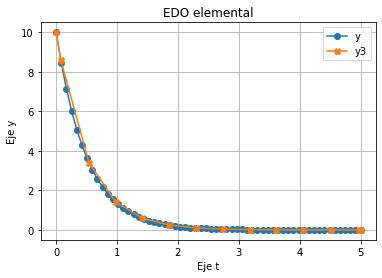

In [15]:
plt.plot(t, y[0, :], 'o-')
plt.plot(sol_3.t, sol_3.y[0, :], 'X-')
plt.grid()
plt.xlabel('Eje t')
plt.ylabel('Eje y')
plt.title('EDO elemental')
plt.legend(['y','y3'], loc = 0)

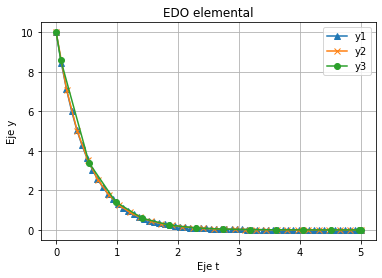

In [16]:
plt.plot(t, y[0, :], '^-')
plt.plot(sol_2.t, sol_2.y[0, :], 'x-')
plt.plot(sol.t, sol.y[0, :], 'o-')
plt.grid()
plt.xlabel('Eje t')
plt.ylabel('Eje y')
plt.title('EDO elemental')
plt.legend(['y1','y2','y3'], loc = 0)

### Utilizando otros métodos

scipy.integrate.solve_ivp(fun, t_span, y0, method='RK45', t_eval=None, dense_output=False, events=None, vectorized=False, args=None, **options)

methodstring or OdeSolver, optional

    Integration method to use:

            ‘RK45’ (default): Explicit Runge-Kutta method of order 5(4) [1]. The error is controlled assuming accuracy of the fourth-order method, but steps are taken using the fifth-order accurate formula (local extrapolation is done). A quartic interpolation polynomial is used for the dense output [2]. Can be applied in the complex domain.

            ‘RK23’: Explicit Runge-Kutta method of order 3(2) [3]. The error is controlled assuming accuracy of the second-order method, but steps are taken using the third-order accurate formula (local extrapolation is done). A cubic Hermite polynomial is used for the dense output. Can be applied in the complex domain.

            ‘DOP853’: Explicit Runge-Kutta method of order 8 [13]. Python implementation of the “DOP853” algorithm originally written in Fortran [14]. A 7-th order interpolation polynomial accurate to 7-th order is used for the dense output. Can be applied in the complex domain.

            ‘Radau’: Implicit Runge-Kutta method of the Radau IIA family of order 5 [4]. The error is controlled with a third-order accurate embedded formula. A cubic polynomial which satisfies the collocation conditions is used for the dense output.

            ‘BDF’: Implicit multi-step variable-order (1 to 5) method based on a backward differentiation formula for the derivative approximation [5]. The implementation follows the one described in [6]. A quasi-constant step scheme is used and accuracy is enhanced using the NDF modification. Can be applied in the complex domain.

            ‘LSODA’: Adams/BDF method with automatic stiffness detection and switching [7], [8]. This is a wrapper of the Fortran solver from ODEPACK.



In [17]:
λ = 2.0   # Constante de decaimiento
def f(t, y):  # tener presente el nombre de la función 'f'
    f = np.array([-λ * y])
    return f

In [18]:
y0 = np.array([10])   # Hacemos un arreglo con un dato igual a 10

tini = 0   # Este es el intervalo de trabajo, tiempo inicial
tfin = 5   # tiempo final
t = np.linspace(tini, tfin, 60)

In [19]:
meth_A = 'RK45'    # (default): Explicit Runge-Kutta method of order 5(4)
#meth_A = 'RK23'   # Explicit Runge-Kutta method of order 3(2)
meth_B = 'DOP853'  # Explicit Runge-Kutta method of order 8 [13]

sol_4 = solve_ivp(f, (tini, tfin), y0, method = meth_A, t_eval = time, )
sol_5 = solve_ivp(f, (tini, tfin), y0, method = meth_B, t_eval = time, )

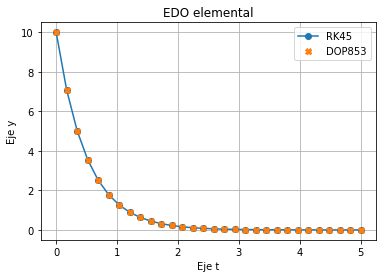

In [20]:
#plt.plot(t, y[0, :], 'o-')
plt.plot(sol_4.t, sol_4.y[0, :], 'o-')
plt.plot(sol_5.t, sol_5.y[0, :], 'X')
plt.grid()
plt.xlabel('Eje t')
plt.ylabel('Eje y')
plt.title('EDO elemental')
plt.legend([meth_A,meth_B], loc = 0)

## Ecuaciones diferenciales de orden superior 

El sistema debe escribirse en términos de primer orden. Sólo ecuaciones diferenciales. Para resolver un sistema con derivadas de orden superior, primero escribirá un sistema en cascada de ecuaciones de primer orden y luego utilícelas en su función diferencial. Para ejemplo, suponga que tiene un sistema caracterizado por sacudidas constantes: 

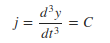

Lo primero que hay que hacer es escribir tres diferenciales de primer orden ecuaciones para representar la ecuación de tercer orden:

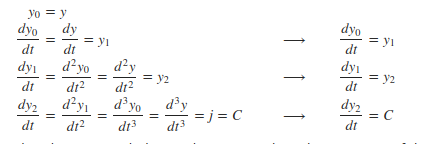

Observe cómo las derivadas caen en cascada de modo que la ecuación de sacudida constante ahora se puede escribir como un conjunto de tres ecuaciones de primer orden. Tenga en cuenta que en este sistema, $y[0]$ representa la posición, $y[1]$ representa la velocidad y y $[2]$ representa la aceleración.  
Este tipo de sistema en cascada aparecen a menudo cuando se modelan ecuaciones de movimiento. 

Tendremos que acordarnos ahora de cómo reducir las ecuaciones de orden superior.  
De nuevo, vamos a probar con un ejemplo académico:

$$y + y'' = 0$$
$$y = -y''$$
definimos $\mathbf{y} \leftarrow \pmatrix{y \\ y'}$  
con  $\mathbf{y} = \mathbf{y[0]}$  
y con $\mathbf{y'} = \mathbf{y[1]}$  


$$\mathbf{f}(\mathbf{y}) = \frac{d\mathbf{y}}{dt} =  \pmatrix{y \\ y'}' = \pmatrix{y' \\ y''} = \pmatrix{y' \\ -y}$$
$$
\mathbf{y'} = \pmatrix{y' \\ -y}
$$
esto es
$$
\mathbf{y'} = \pmatrix{y[1] \\ -y[0]}
$$


In [21]:
def f(t, y):
    f = np.array([y[1], -y[0]])
    return f

In [22]:
tini = 0
tfin = 10

t = np.linspace(tini, tfin)   # por default son 50 pasos
y0 = np.array([1.0, 0.0]) # un arreglo de dos elementos

In [23]:
print(y0)

[1. 0.]


In [24]:
sol = solve_ivp(f, (tini, tfin), y0, t_eval = t)

Text(0.5, 1.0, 'EDO de segundo orden')

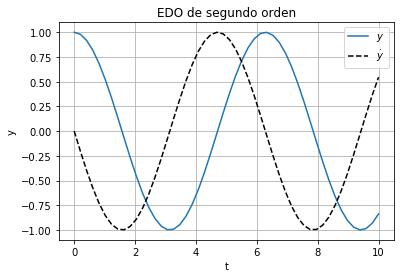

In [25]:
plt.plot(t, sol.y[0, :], label='$y$')
plt.plot(t, sol.y[1, :], '--k', label='$\dot{y}$')
plt.legend()
plt.grid()
plt.xlabel('t')
plt.ylabel('y')
plt.title('EDO de segundo orden')

### Otro Ejemplo

Decaimiento exponencial básica que muestra los puntos de tiempo elegidos automáticamente.

In [26]:
# from scipy.integrate import solve_ivp
def exponential_decay(t, y): 
    λ = 0.5
    return -λ * y

In [27]:
intervalo = [0, 30]

sol = solve_ivp(exponential_decay, intervalo, [2])
print(sol.y[0])

[2.00000000e+00 1.88835583e+00 1.06324380e+00 4.33165311e-01
 1.80149050e-01 7.48084146e-02 3.10501862e-02 1.28706622e-02
 5.31822949e-03 2.18125645e-03 8.79557875e-04 3.41885460e-04
 1.23677234e-04 3.95256478e-05 1.04501705e-05 2.14241877e-06
 6.61382161e-07]


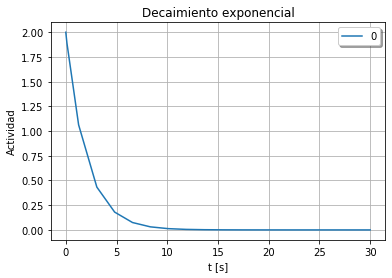

In [28]:
plt.plot(sol.t, sol.y[0])
plt.xlabel('t [s]')
plt.ylabel('Actividad')
plt.legend(['0'], shadow=True)
plt.title('Decaimiento exponencial')
plt.grid()
plt.show()

Podemos calcular tres ecuaciones (o más) a la vez, con distintas actividades iniciales

In [29]:
sol = solve_ivp(exponential_decay, intervalo, [2, 4, 8])

In [30]:
print(sol.y)

[[2.00000000e+00 1.88836035e+00 1.06327177e+00 4.33193118e-01
  1.80172534e-01 7.48304534e-02 3.10715779e-02 1.28917348e-02
  5.33904549e-03 2.20167438e-03 8.99146274e-04 3.59729261e-04
  1.38307144e-04 4.95564437e-05 1.57924962e-05 4.19606550e-06
  8.68633574e-07 6.56828278e-07]
 [4.00000000e+00 3.77672070e+00 2.12654355e+00 8.66386236e-01
  3.60345068e-01 1.49660907e-01 6.21431557e-02 2.57834695e-02
  1.06780910e-02 4.40334876e-03 1.79829255e-03 7.19458522e-04
  2.76614289e-04 9.91128874e-05 3.15849924e-05 8.39213101e-06
  1.73726715e-06 1.31365656e-06]
 [8.00000000e+00 7.55344140e+00 4.25308709e+00 1.73277247e+00
  7.20690135e-01 2.99321814e-01 1.24286311e-01 5.15669390e-02
  2.13561820e-02 8.80669753e-03 3.59658510e-03 1.43891704e-03
  5.53228577e-04 1.98225775e-04 6.31699849e-05 1.67842620e-05
  3.47453430e-06 2.62731311e-06]]


Grafiquemos

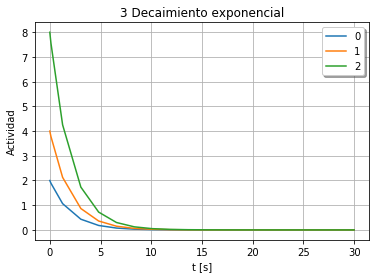

In [31]:
plt.plot(sol.t, sol.y[0])
plt.plot(sol.t, sol.y[1])
plt.plot(sol.t, sol.y[2])
plt.xlabel('t [s]')
plt.ylabel('Actividad')
plt.legend(['0', '1', '2'], shadow=True)
plt.title('3 Decaimiento exponencial')
plt.grid()
plt.show()

Especificando puntos densos.

In [32]:
sol = solve_ivp(exponential_decay, intervalo, [2], dense_output = True)

In [33]:
t = np.linspace(0, 15, 300)
z = sol.sol(t)

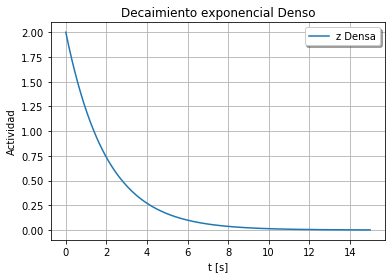

In [34]:
plt.plot(t, z[0])
plt.xlabel('t [s]')
plt.ylabel('Actividad')
plt.legend(['z Densa'], shadow=True)
plt.title('Decaimiento exponencial Denso')
plt.grid()
plt.show()

Especificando puntos donde se desea la solución.

In [35]:
sol = solve_ivp(exponential_decay, [0, 10], [2, 4, 8], t_eval=[0, 1, 2, 4, 10])
print(sol.t)
print(sol.y)

[ 0  1  2  4 10]
[[2.         1.21305369 0.73534021 0.27069123 0.01350781]
 [4.         2.42610739 1.47068043 0.54138247 0.02701561]
 [8.         4.85221478 2.94136085 1.08276494 0.05403123]]


-------------------------------------------------------------------------------
### Carga de un condensador

Elaboramos un script para integrar la ecuación diferencial de primer orden que describe la carga de un condensador.

\begin{equation}
\frac{dq}{dt} = \frac{V_\epsilon}{R}-\frac{q}{RC}
\end{equation}


In [36]:
V0 = 10.0
R  = 2.0   #resistencia 
C  = 0.8 #capacidad ;
tin = 0.0  #situación inicial
tfin = 10.0  #tiempo final
intervalo = [tin, tfin]

t = np.linspace(tin, tfin) 

def condensador(t,x):
    global V0, R, C
    return V0/R-x/(R*C);

sol = solve_ivp(condensador, intervalo, [0], dense_output = True)
q = sol.sol(t)
print(q)

[[0.         0.95805043 1.80147836 2.54375879 3.19701362 3.77212252
  4.27880548 4.72483951 5.11711889 5.4620339  5.7654708  6.03281192
  6.26872283 6.47658348 6.65936516 6.81988855 6.96082372 7.08469011
  7.19385653 7.2904656  7.37587901 7.45111313 7.51716725 7.57502232
  7.62564098 7.66996748 7.70892776 7.74342941 7.77424265 7.80162486
  7.8258027  7.84702178 7.86554074 7.88163129 7.89557819 7.90767928
  7.91824543 7.92760059 7.93608174 7.94378678 7.95062843 7.95666315
  7.96195153 7.96655832 7.9705524  7.9740068  7.97699868 7.97960936
  7.9819243  7.98403307]]


Text(0.5, 1.0, 'Carga del condensador')

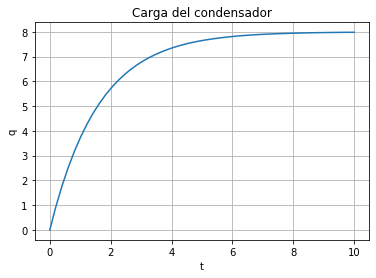

In [37]:
plt.plot(t, q[0])
plt.grid()
plt.xlabel('t')
plt.ylabel('q');
plt.title('Carga del condensador')

### Ecuación diferencial de segundo orden

Una vez que se ha entendido como resolver un sistema de dos ecuaciones diferenciales de primer orden es posible entender la resolución de cualquier ecuación diferencial o sistema.  
Podemos definir las funciones en el mismo archivo o en otro fichero.

\begin{equation}
\frac{dx}{dt} = v \\
\frac{dv}{dt} = f(t, x, v)
\end{equation}

En este sistema de dos ecuaciones diferenciales de primer orden x(1) representará los sucesivos valores de la variable x y x(2) representará a la variable v.  
El mismo criterio se emplea para determinar el vector x0 de las condiciones iniciales.

Como ejemplo, estudiamos oscilaciones amortiguadas.

\begin{equation}
\frac{d^2x}{dt^2} + 2 \gamma \frac{dx}{dt} + \omega_0^2 x = 0 \\
\text{con}
\end{equation}

\begin{equation}
\begin{aligned}
\frac{dx}{dt} &= v \\ 
\frac{dv}{dt} &= - 2 \gamma v - \omega_0^2 x \\
\end{aligned}
\end{equation}

Las funciones a integrar $v$, y $oscilador(t,x,v)$ aparecen en un vector columna

In [38]:
w0 = 2.0 # fecuencia angular
g = 0.5 # constante de rozamiento
# condiciones iniciales
x0 = [0.0, 10.0] # posicion y velocidad iniciales
tin  = 0.0 # tiempo inicial
tfin = 10.0 # tiempo final
intervalo = [tin, tfin]
t = np.linspace(tin, tfin, 101) 

def oscilador(t, x):
    global w0, g
    ec1 = x[1]  # dx/dt = v
    ec2 = -2 * g * x[1] - w0 * w0 * x[0]  # dv/dt = -2gv-w0*w0 x
    return ec1, ec2
    
sol = solve_ivp(oscilador, intervalo, x0, dense_output = True)
osc = sol.sol(t)
#print(osc)

Text(0.5, 1.0, 'Oscilador amortiguado')

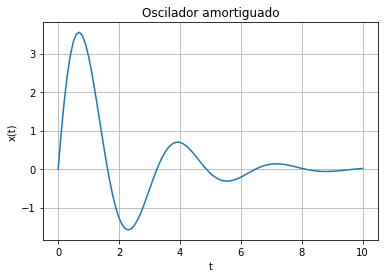

In [39]:
plt.plot(t, osc[0])
plt.grid()
plt.xlabel('t')
plt.ylabel('x(t)');
plt.title('Oscilador amortiguado')

## Sistema de dos ecuaciones diferenciales de segundo orden
En este caso tenemos un sistema de cuatro ecuaciones diferenciales de primer orden
http://www.sc.ehu.es/sbweb/fisica3/numerico/diferencial/diferencial_1.html
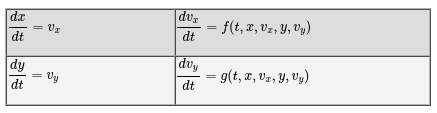  
En este sistema ec(1) representará los sucesivos valores de la variable x y ec(2) representará a la variable vx, ec(3) a la variable y y ec(4) a la variable vy.  
El mismo criterio se empleará para determinar el vector x0 de las condiciones iniciales.

Como ejemplo, estudiamos el movimiento de un planeta alrededor del Sol o de un satélite artificial alrededor de la Tierra.
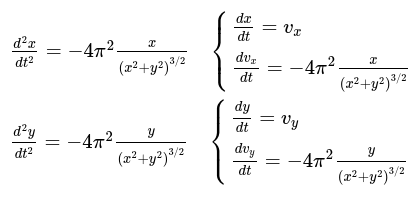

In [40]:
# movement of a planet around the Sun or of an artificial satellite around the Earth
# initial position x, velocity x, position y, velocity y
x0=[1.0, 0.0, 0.0, 6.27] # x, vx, y, vy
tin  = 0.0 # initial time
tfin = 3.0 # final time
intervalo = [tin, tfin]
t = np.linspace(tin, tfin, 201)

def orbita(t, x):
    ec1 = x[1]
    ec2 = - 4.0 * np.pi**2 * x[0] / np.sqrt(x[0]**2+x[2]**2)**3
    ec3 = x[3]
    ec4 = - 4.0 * np.pi**2 * x[2] / np.sqrt(x[0]**2+x[2]**2)**3
    return ec1, ec2, ec3, ec4


In [41]:
#meth_A = 'RK23'   # Explicit Runge-Kutta method of order 3(2)
#meth_B = 'RK45'    # (default): Explicit Runge-Kutta method of order 5(4)
#meth_C = 'DOP853'  # Explicit Runge-Kutta method of order 8 [13]
sol_A = solve_ivp(orbita, intervalo, x0, method = 'RK23', dense_output = True)
orb_A = sol_A.sol(t)
sol_B = solve_ivp(orbita, intervalo, x0, method = 'RK45', dense_output = True)
orb_B = sol_B.sol(t)
sol_C = solve_ivp(orbita, intervalo, x0, method = 'DOP853', dense_output = True)
orb_C = sol_C.sol(t)
#print(orb)

Text(0.5, 1.0, 'Orbit of the planet Pythonium')

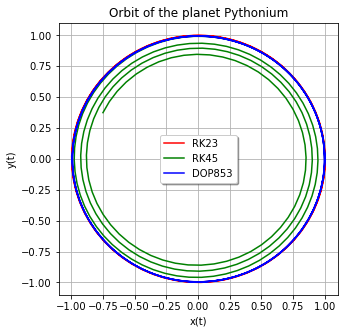

In [42]:
plt.figure(figsize=(5.0, 5.0))
plt.plot(orb_A[0], orb_A[2], 'r')
plt.plot(orb_B[0], orb_B[2], 'g')
plt.plot(orb_C[0], orb_C[2], 'b')
plt.legend(['RK23', 'RK45', 'DOP853'], shadow=True)
plt.grid()
plt.xlabel('x(t)')
plt.ylabel('y(t)');
plt.title('Orbit of the planet Pythonium')

## Disparo de cañón 

El cañón dispara hacia arriba con un evento final al impactar.  
Definimos y[0] es la posición inicial e y[1] es la velocidad inicial.  
El proyectil comienza en la posición 0 con velocidad +200.

In [43]:
g = 9.8
def disparo(t, y): 
    return [y[1], -0.5*g]

sol = solve_ivp(disparo, [0, 100], [0, 200], dense_output = True)

In [44]:
t = np.linspace(0, 90, 300)
z = sol.sol(t)

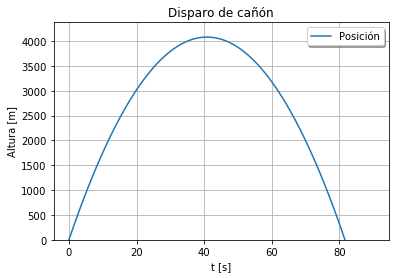

In [45]:
plt.plot(t, z[0])
plt.xlabel('t [s]')
plt.ylabel('Altura [m]')
plt.ylim(0,)
plt.legend(['Posición'], shadow=True)
plt.title('Disparo de cañón')
plt.grid()
plt.show()

## Ecuaciones de Lotka-Volterra  
Las ecuaciones de Lotka-Volterra, también conocidas como ecuaciones predador-presa o presa-predador, son un par de ecuaciones diferenciales de primer orden no lineales que se usan para describir dinámicas de sistemas biológicos en el que dos especies interactúan, una como presa y otra como depredador.  
Las ecuaciones fueron propuestas de forma independiente por Alfred J. Lotka en 1925 y Vito Volterra en 1926.  Tales ecuaciones se definen como:

$${\displaystyle {\frac {dx}{dt}}=x(\alpha -\beta y)}$$

$${\displaystyle {\frac {dy}{dt}}=-y(\gamma -\delta x)}$$

donde:

*y* es el número de algún predador (por ejemplo, un lobo);  
*x* es el número de sus presas (por ejemplo, conejos);  
*dy/dt* y *dx/dt* representa el crecimiento de las dos poblaciones en el tiempo;  
*t* representa el tiempo; y  
*α, β, γ y δ* son parámetros (positivos) que representan las interacciones de las dos especies. En las ecuaciones, por razones de simpleza, las llamaremos *a, b, c, d*, respectivamente.

In [46]:
def lotkavolterra(t, z, a, b, c, d):
    x, y = z
    ec1 =  x * (a - b * y) # a*x - b*x*y
    ec2 = -y * (c - d * x) # -c*y + d*x*y
    return [ec1, ec2]
#    return [x*(a - b*y), -y*(c + d*x)]

In [47]:
# pass in the parameter values a=1.5, b=1, c=3 and d=1 with the args argument.
a, b, c, d = 1.5, 1.0, 3.0, 1.0
conejos = 10
zorros = 5
tini = 0
tfin = 20
sol = solve_ivp(lotkavolterra, [tini, tfin], [conejos, zorros], args=(a, b, c, d), dense_output=True)

In [48]:
t = np.linspace(tini, tfin, 300)
z = sol.sol(t)

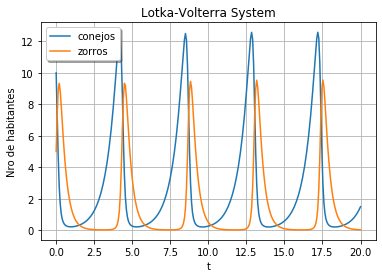

In [49]:
plt.plot(t, z.T)
plt.xlabel('t')
plt.ylabel('Nro de habitantes')
plt.legend(['conejos', 'zorros'], shadow=True)
plt.title('Lotka-Volterra System')
plt.grid(True)
plt.show()

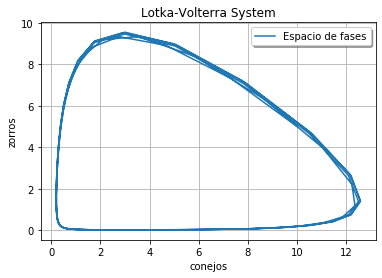

In [50]:
plt.plot(z[0], z[1])
plt.xlabel('conejos')
plt.ylabel('zorros')
plt.legend(['Espacio de fases'], shadow=True)
plt.title('Lotka-Volterra System')
plt.grid(True)
plt.show()

## Ecuación de Bateman
El decaimiento radiactivo se rige por el siguiente sistema de ecuaciones diferenciales, para el caso de dos isótipos ligados genealógicamente como progenitor/hija

Isótopo madre $$\frac{dN_a(t)}{dt} = - \lambda_a N_a(t)$$   
Isótopo hija $$\frac{dN_b(t)}{dt} =  \lambda_a N_a(t) -  \lambda_b N_b(t)$$ 

In [51]:
# ln(2) = 0.69314718056
def bateman(t, z, a, b):
    x, y = z
    ec1 =  - x * a
    ec2 =  - y * b + x * a
    return [ec1, ec2]

In [52]:
Ta = 500 # Período medio del isótopo madre en segundos
Tb = 300 # Período medio del isótopo hija en segundos

# ln(2) = 0.69314718056
a = 0.69314718056 / Ta # Cálculo de la Constante de Decaimiento Radiactivo
b = 0.69314718056 / Tb # Cálculo de la Constante de Decaimiento Radiactivo

Aa = 200 # Actividad inicial del isótopo madre
Ab = 0 # Actividad inicial del isótopo hija
tini = 0
tfin = 7 * Ta
bat = solve_ivp(bateman, [tini, tfin], [Aa, Ab], args=(a, b), dense_output=True)

In [53]:
t = np.linspace(tini, tfin, 300)
z = bat.sol(t)

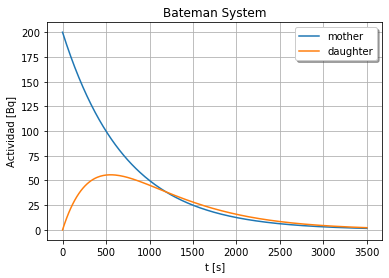

In [54]:
plt.plot(t, z.T)
plt.xlabel('t [s]')
plt.ylabel('Actividad [Bq]')
plt.legend(['mother', 'daughter'], shadow=True)
plt.title('Bateman System')
plt.grid()
plt.show()

### Atractor de Lorenz

El atractor de Lorenz es un concepto introducido por Edward Lorenz en 1963. Se trata de un sistema dinámico determinista tridimensional no lineal derivado de las ecuaciones simplificadas de rollos de convección que se producen en las ecuaciones dinámicas de la atmósfera terrestre.

Para ciertos valores de los parámetros a, b, c, el sistema exhibe un comportamiento caótico y muestra lo que actualmente se llama un atractor extraño; esto fue probado por Warwick Tucker en 2002.  

El atractor extraño en este caso es un fractal de dimensión de Hausdorff entre 2 y 3. Grassberger (1983) ha estimado la dimensión de Hausdorff en 2,06 ± 0,01 y la dimensión de correlación en 2,05 ± 0,01.

El sistema aparece en láseres, en generadores eléctricos y en determinadas ruedas de agua.

$$\frac{dx}{dt} = a(y-x) $$ 
    
$$\frac{dy}{dt} = x(b-z)-y $$ 

$$\frac{dz}{dt} = xy-cz $$

donde $a$ es llamado el número de **Prandtl** y $b$ se llama el número de **Rayleigh**.

$a , b , c \gt 0 $, pero es usualmente $a = 10$, $c = 8 / 3$ y b es variado.  
El sistema exhibe un comportamiento caótico para $b = 28$ pero muestra órbitas periódicas para otros valores de $b$; por ejemplo, con $b = 99$, se convierte en un nudo tórico llamado T(3;2).

La forma de mariposa del atractor de Lorenz puede haber inspirado el nombre del *efecto mariposa* en la teoría del caos. 

https://es.wikipedia.org/wiki/Atractor_de_Lorenz

$$\frac{dx}{dt} = a(y-x) $$ 
    
$$\frac{dy}{dt} = x(b-z)-y $$ 

$$\frac{dz}{dt} = xy-cz $$


In [55]:
from mpl_toolkits.mplot3d import Axes3D 

In [56]:
def lorenz(t, w, a, b, c):
    x, y, z = w
    ec1 = a * (y - x)
    ec2 = x * (b - z) - y
    ec3 = x * y - c * z
    return [ec1, ec2, ec3]

In [57]:
a = 10.0
b = 99.0 # 28.0 # 99
c = 8.0/3.0
tini, tfin = 0.0, 100.0
#(0., 1., 1.05)
y0 = [0., 1., 1.05]

In [58]:
lor = solve_ivp(lorenz, [tini, tfin], y0, args=(a, b, c), dense_output=True)

In [59]:
t = np.linspace(tini, tfin, 100000)
k = lor.sol(t)

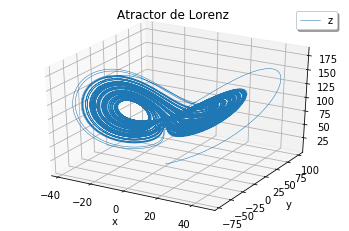

In [60]:
plt.figure().add_subplot(projection='3d')

plt.plot(*k, lw=0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['z'], shadow=True)
plt.title('Atractor de Lorenz ')

plt.show()


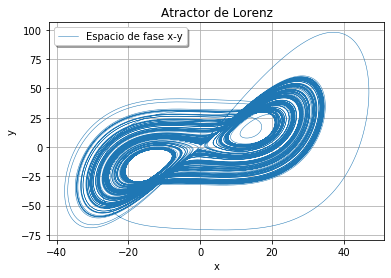

In [61]:
plt.plot(k[0],k[1], lw=0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['Espacio de fase x-y'], shadow=True)
plt.title('Atractor de Lorenz')
plt.grid()
plt.show()

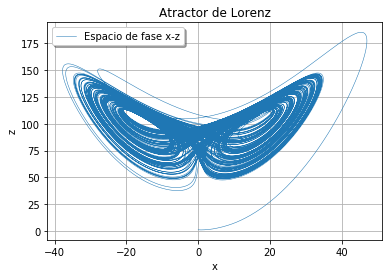

In [62]:
plt.plot(k[0],k[2], lw=0.5)
plt.xlabel('x')
plt.ylabel('z')
plt.legend(['Espacio de fase x-z'], shadow=True)
plt.title('Atractor de Lorenz')
plt.grid()
plt.show()

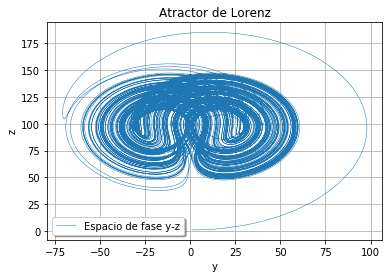

In [63]:
plt.plot(k[1],k[2], lw=0.5)
plt.xlabel('y')
plt.ylabel('z')
plt.legend(['Espacio de fase y-z'],  loc=0, shadow=True)
plt.title('Atractor de Lorenz')
plt.grid()
plt.show()